Import Libraries

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler

from sklearn.ensemble import RandomForestClassifier

Load Data

In [19]:
data = pd.read_csv("mental_health_dataset.csv")
data.head()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [20]:
data.shape

(10000, 14)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

In [22]:
data.isnull().sum()

age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
seeks_treatment           0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64

<Axes: xlabel='mental_health_risk', ylabel='count'>

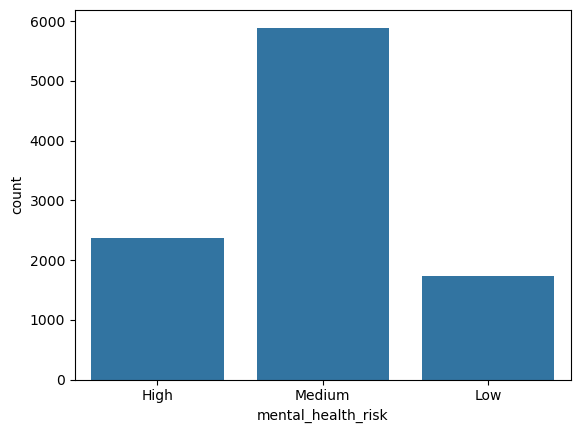

In [23]:
sns.countplot(x='mental_health_risk', data=data)

Encode Categorical data:
gender- 
employment_status-
work_environment-
mental_health_history-
seeks_treatment-
mental_health_risk

In [24]:
categorical_cols = ["gender", "employment_status", "work_environment",
                    "mental_health_history", "seeks_treatment", "mental_health_risk"]

for col in categorical_cols:
    print(col, ":", data[col].unique())

gender : ['Male' 'Female' 'Non-binary' 'Prefer not to say']
employment_status : ['Employed' 'Student' 'Self-employed' 'Unemployed']
work_environment : ['On-site' 'Remote' 'Hybrid']
mental_health_history : ['Yes' 'No']
seeks_treatment : ['Yes' 'No']
mental_health_risk : ['High' 'Medium' 'Low']


Encode Binary and label: using label encoding

In [25]:
binary_cols = ['mental_health_history', 'seeks_treatment', 'mental_health_risk']
le = LabelEncoder()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])
data

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,1,1,6,6.2,3,28,17,54,59.7,0
1,46,Female,Student,On-site,0,1,10,9.0,4,30,11,85,54.9,0
2,32,Female,Employed,On-site,1,0,7,7.7,2,24,7,62,61.3,2
3,60,Non-binary,Self-employed,On-site,0,0,4,4.5,4,6,0,95,97.0,1
4,25,Female,Self-employed,On-site,1,1,3,5.4,0,24,12,70,69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,Female,Employed,On-site,1,1,5,6.1,3,9,21,8,90.0,2
9996,47,Male,Employed,On-site,1,0,1,5.7,3,5,12,45,90.8,2
9997,56,Female,Employed,On-site,1,0,1,8.3,0,1,18,7,99.2,2
9998,24,Male,Employed,On-site,1,1,9,6.1,0,28,21,32,56.7,0


Encode multi: using one hot encoding

In [26]:
multi_cols = ['gender', 'employment_status', 'work_environment']
ohe = OneHotEncoder(sparse_output=False)

one_hot = ohe.fit_transform(data[multi_cols])

one_hot_df = pd.DataFrame(one_hot, columns=ohe.get_feature_names_out(multi_cols), index=data.index)

data = data.drop(multi_cols, axis=1)
data = pd.concat([data, one_hot_df], axis=1)

Scaling numeirc tabels

In [27]:
numeric_cols = ['age', 'stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score']

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

data

,age,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,...,gender_Male,gender_Non-binary,gender_Prefer not to say,employment_status_Employed,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,work_environment_Hybrid,work_environment_On-site,work_environment_Remote
0,1.050441,1,1,0.148220,-0.185227,-0.221543,1.441550,1.018328,0.132829,-1.252602,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.323110,0,1,1.533455,1.714534,0.216549,1.664010,0.069310,1.193462,-1.593984,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.695154,1,0,0.494529,0.832502,-0.659636,0.996631,-0.563369,0.406541,-1.138808,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.341373,0,0,-0.544397,-1.338653,0.216549,-1.005507,-1.670557,1.535602,1.400220,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.204286,1,1,-0.890706,-0.728015,-1.535821,0.996631,0.227480,0.680253,-0.591175,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.549688,1,1,-0.198089,-0.253075,-0.221543,-0.671817,1.651007,-1.441014,0.902371,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,0.395843,1,0,-1.583323,-0.524470,-0.221543,-1.116737,0.227480,-0.175097,0.959268,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,1.050441,1,0,-1.583323,1.239594,-1.535821,-1.561656,1.176498,-1.475228,1.556687,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,-1.277019,1,1,1.187146,-0.253075,-1.535821,1.441550,1.651007,-0.619879,-1.465966,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Split data to features and labels

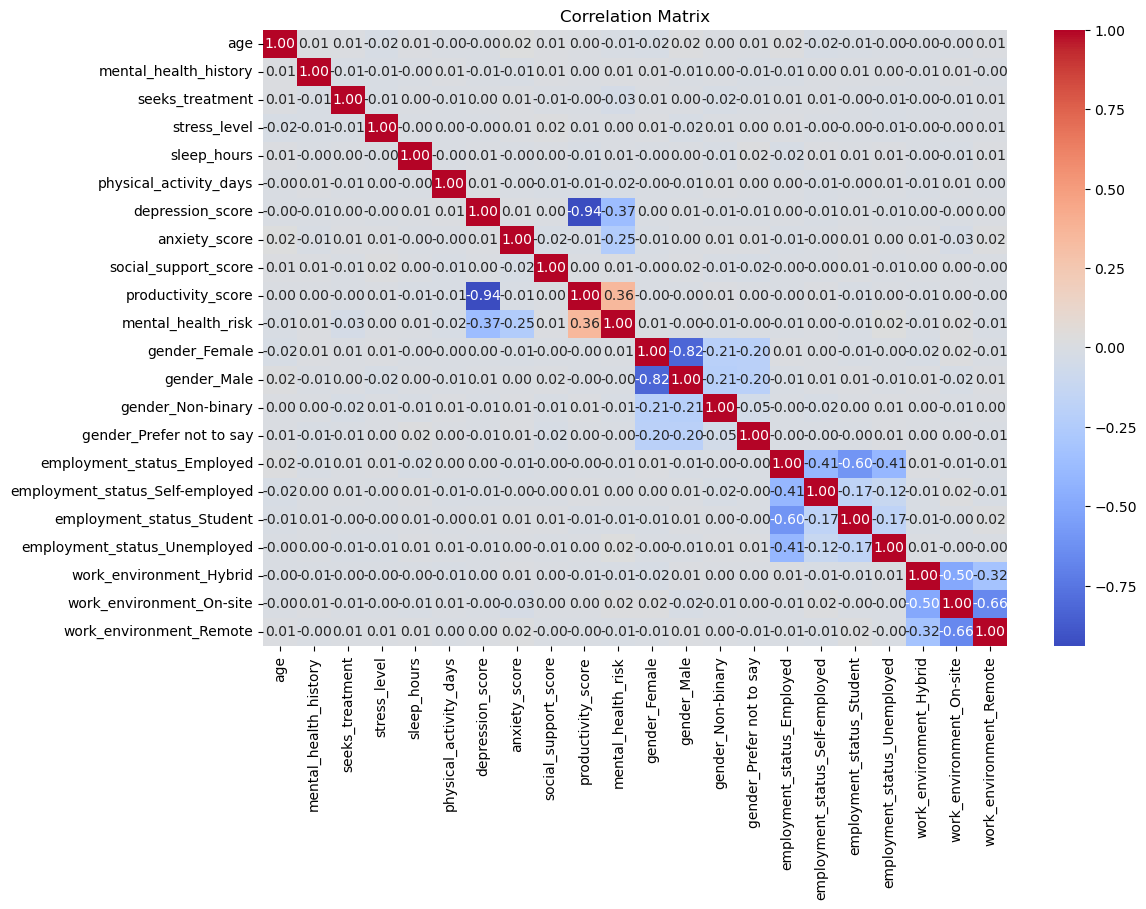

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [29]:
data = data.drop(['age','depression_score','mental_health_history', 'seeks_treatment','stress_level', 'sleep_hours', 'physical_activity_days', 'social_support_score', 'gender_Male','work_environment_Remote', 'employment_status_Employed'], axis = 1)
data

,anxiety_score,productivity_score,mental_health_risk,gender_Female,gender_Non-binary,gender_Prefer not to say,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,work_environment_Hybrid,work_environment_On-site
0,1.018328,-1.252602,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.069310,-1.593984,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.563369,-1.138808,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.670557,1.400220,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.227480,-0.591175,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.651007,0.902371,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9996,0.227480,0.959268,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,1.176498,1.556687,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,1.651007,-1.465966,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


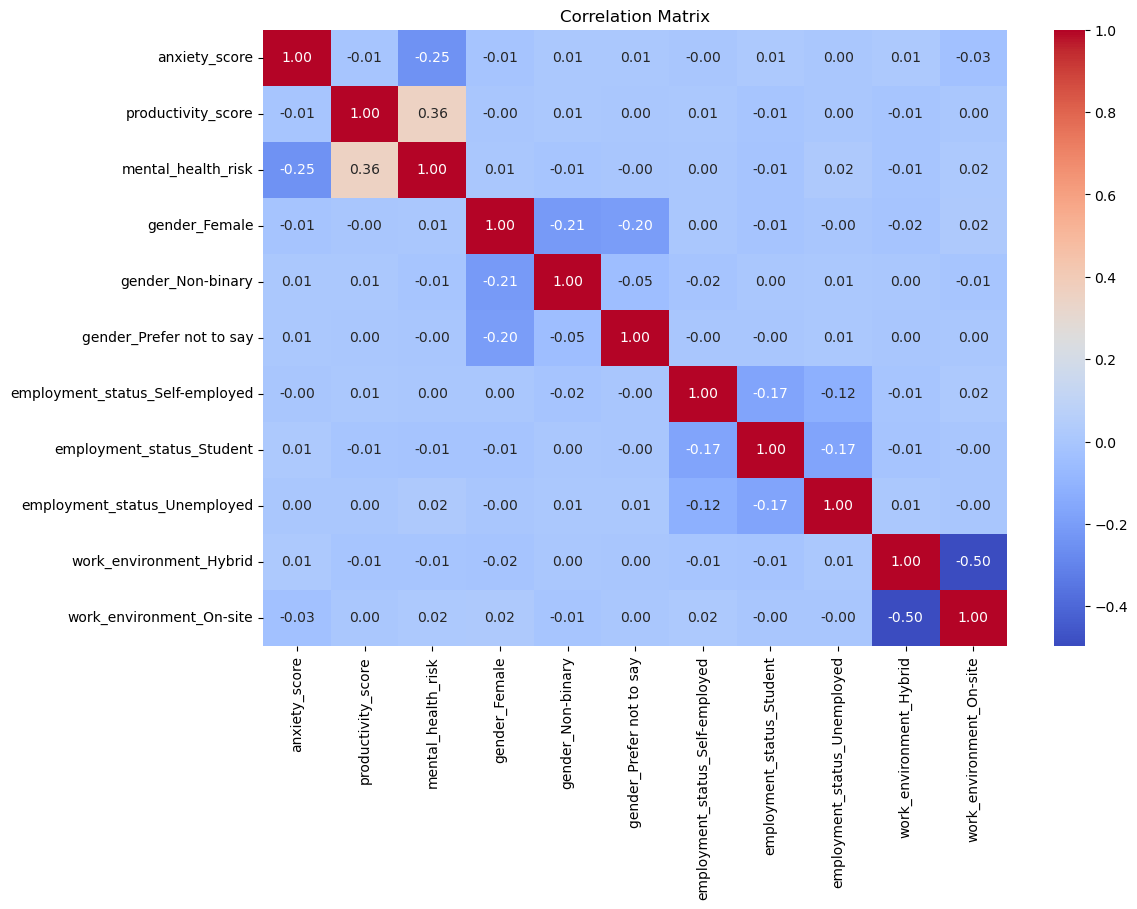

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [31]:
X = data.drop("mental_health_risk", axis = 1)
y = data["mental_health_risk"]

Split data to train and test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


Models training

In [33]:
model = RandomForestClassifier(max_depth= 5, n_estimators=100, random_state=42)

In [34]:
model.fit(X_train, y_train)
    
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
    
print(f"Random Forest :\n Train Accuarcy: {train_acc}, Test Accuarcy: {test_acc}")

Random Forest :
 Train Accuarcy: 0.858, Test Accuarcy: 0.8625
